
### Intro

In recent years, the financial markets have witnessed a surge in the use of artificial intelligence (AI) and machine learning (ML) techniques for predicting stock prices and making informed investment decisions. This project aims to develop a simple equity prediction model using synthetic stock price data. By leveraging historical price movements and trading volumes, we will create a binary classification model that predicts whether a stock's price will rise or fall on the following trading day. 

The model will utilize a Random Forest Classifier, a popular machine learning algorithm known for its robustness and effectiveness in handling classification tasks. We will generate synthetic stock data to simulate real-world scenarios, allowing us to explore the model's performance without relying on actual market data. Through this project, we aim to demonstrate the fundamental concepts of data preparation, feature engineering, model training, and evaluation in the context of stock price prediction

[[70 27]
 [33 70]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        97
           1       0.72      0.68      0.70       103

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



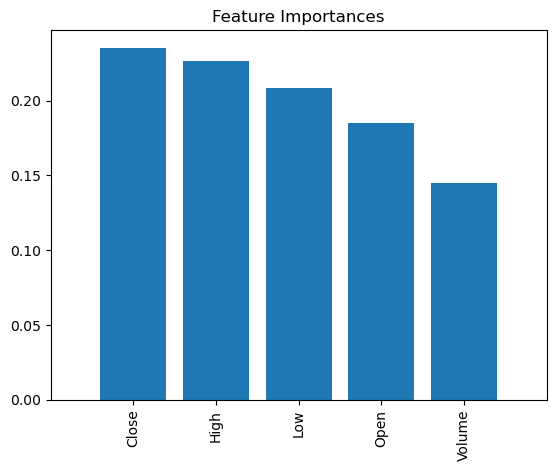

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic stock price data
num_days = 1000  # Number of days of data
dates = pd.date_range(start='2020-01-01', periods=num_days, freq='B')  # Business days

# Generate random stock prices
open_prices = np.random.uniform(low=100, high=200, size=num_days)
close_prices = open_prices + np.random.uniform(low=-10, high=10, size=num_days)
high_prices = np.maximum(open_prices, close_prices) + np.random.uniform(low=0, high=5, size=num_days)
low_prices = np.minimum(open_prices, close_prices) - np.random.uniform(low=0, high=5, size=num_days)
volume = np.random.randint(low=1000, high=10000, size=num_days)

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Volume': volume
})

# Set the Date as the index
data.set_index('Date', inplace=True)

# Create a new column for the target variable: 1 if the price goes up, 0 if it goes down
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Drop rows with NaN values
data.dropna(inplace=True)

# Select features and target
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]
target = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Optional: Visualize feature importances
importances = model.feature_importances_
feature_names = features.columns
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



### Explanation of the Code:

- **Library Imports**: The necessary libraries are imported at the beginning.
- **Synthetic Data Generation**: The code generates synthetic stock price data for 1000 business days, including 'Open', 'High', 'Low', 'Close', and 'Volume'.
-  **Target Variable Creation**: A target variable is created to indicate whether the stock price will go up or down the next day.
- **Data Preparation**: The dataset is cleaned by dropping any rows with NaN values, and features and target variables are selected.
- **Train-Test Split**: The dataset is split into training and testing sets.
- **Model Initialization and Training**: A Random Forest Classifier is initialized and trained on the training data.
- **Predictions and Evaluation**: Predictions are made on the test set, and the model's performance is evaluated using a confusion matrix and classification report.
- **Feature Importance Visualization**: The importance of each feature is visualized using a bar chart.





### Conclusion

In conclusion, this project successfully demonstrates the application of machine learning techniques in predicting stock price movements using synthetic data. By generating a dataset that mimics real-world stock prices, we were able to train a Random Forest Classifier to classify whether the stock price would increase or decrease the following day. The evaluation metrics, including the confusion matrix and classification report, provide insights into the model's performance, highlighting its strengths and areas for improvement.

While this model serves as a foundational example, it also opens the door to further exploration and enhancement. Future work could involve incorporating additional features, such as technical indicators or macroeconomic factors, and experimenting with more advanced algorithms. Ultimately, the integration of AI in financial markets holds great potential for improving decision-making processes and optimizing investment strategies, paving the way for more sophisticated and accurate predictive models in the future.